## Input times weights....

In [1]:
print("Hii")

Hii


In [0]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

dataset = load_boston()

X = dataset.data
y = dataset.target
y = y.reshape((506, 1))

def compute_cost(X, y, w):
    outputs = np.dot(X, w)
    return 0.5 * np.mean((outputs - y) ** 2) # is same as below, but cleaner.
    # return (1/(2*506)) * np.sum((outputs - y) ** 2)

mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu) / sigma

n_samples = len(y)
X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
w = np.zeros((n_features, 1)) # initializing weight with zeros!!! But no problem for linear regression.

print(X.shape, y.shape) # ((506, 13), (506, 1))

initial_cost = compute_cost(X, y, w)
print("\nInitial cost is: ", initial_cost)

lr = 0.01
epochs = 1500
history1 = []
for i in range(epochs):
    outputs = np.dot(X, w)
    w = w - lr * X.T @ (outputs - y)/n_samples
    # here that matrix operation does the magic.
    # it automatically sums the gradients obtained by all the examples in X
    # and when dividing it by n_samples we are taking the average
    history1.append(compute_cost(X, y, w))

final_outputs1 = np.dot(X, w)

print("Final cost is: ", history1[-1])
print('\nFinal Weights:\n', w[1:])
print('Final Bias:', w[0])

(506, 14) (506, 1)

Initial cost is:  296.0734584980237
Final cost is:  11.007133812462985

Final Weights:
 [[-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]]
Final Bias: [22.53279993]


## Input times weights add a bias....

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

dataset = load_boston()

X = dataset.data
y = dataset.target
# y = y.reshape((506, 1))

def compute_cost(X, y, b, w):
    outputs = np.dot(X, w) + b
    return 0.5 * np.mean((outputs - y) ** 2) # is same as below, but cleaner.
    # return (1/(2*506)) * np.sum((outputs - y) ** 2)

# if you are comparing then you have to initialize parameters here with zeros as well.
w = np.zeros((13, 1))
b = np.zeros((1))
# shape of (1, 1) is same as (1) when add bias (as it automatically gets broadcasted).
# you can also set b as below. No need to create np.ndarray of a single value like bias in case of linear regression.
# b = 0.0 

mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu) / sigma

print(X.shape, y.shape) # ((506, 13), (506, 1))

initial_cost = compute_cost(X, y, b, w)
print("\nInitial cost is: ", initial_cost)

lr = 0.01
epochs = 1500
history2 = []
for i in range(epochs):
    outputs = np.dot(X, w) + b
    w = w - lr * X.T @ (outputs - y)/n_samples # this weight update is exactly the same as in previous case.
    # but for bias you need to take special care of.
    # below shape of outputs = shape of y = (506, 1).
    # so of course shape of (outputs - y) would be (506, 1) as well.
    # thus you have to take mean of those gradients, and then update your bias.
    # otherwise you bias of initial shape (1) would be replaced by a new tensor of shape (506, 1).
    # so next time if you add this bias to your np.dot(X, w) then 506 different bias values are added to 506 different examples.
    b = b - lr * np.mean(outputs - y) # thus we have to take the mean of gradient of shape (506, 1), which then will become of a scaler.
    history2.append(compute_cost(X, y, b, w))

final_outputs2 = np.dot(X, w) + b

print("Final cost is: ", history2[-1])
print('\nFinal Weights:\n', w)
print('Final Bias:', b)

(506, 13) (506,)

Initial cost is:  296.07345849802374
Final cost is:  42.20977807810319

Final Weights:
 [[ 1.26732178e-15 -1.35352142e-15  1.30944882e-14 ...  1.21992886e-15
  -9.30468304e-16 -1.23021995e-14]
 [-7.24745527e-15  3.73733122e-15 -5.66512691e-14 ... -7.01341330e-15
   1.86613779e-15  4.84869841e-14]
 [-2.15326220e-14  9.19656558e-15 -1.58857556e-13 ... -2.04798848e-14
   4.06453938e-15  1.34119583e-13]
 ...
 [-2.79328602e-14  1.64108925e-14 -2.25999281e-13 ... -2.60911187e-14
   9.07357742e-15  1.95853942e-13]
 [ 1.50531761e-14 -1.02275564e-14  1.27613335e-13 ...  1.40241354e-14
  -6.00267590e-15 -1.12395120e-13]
 [-1.88165250e-14  7.14323130e-15 -1.34739826e-13 ... -1.77231966e-14
   2.83439117e-15  1.12404757e-13]]
Final Bias: [22.53279993]


## Comparing objective loss function convergence of (W.X) vs (W.X + b)

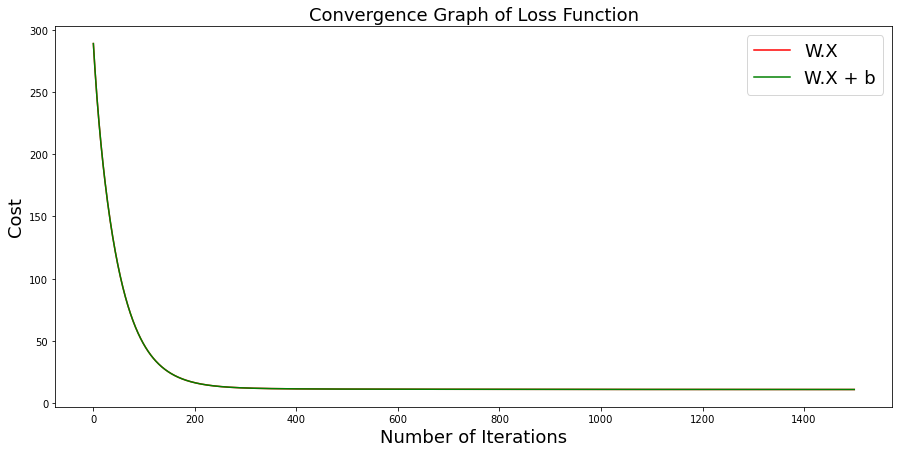

In [0]:
plt.figure(figsize = (15, 7))
plt.plot(range(len(history1)), history1, 'r', label = 'W.X')
plt.plot(range(len(history2)), history2, 'g', label = 'W.X + b')
plt.title("Convergence Graph of Loss Function", fontsize = 18)
plt.xlabel("Number of Iterations", fontsize = 18)
plt.ylabel("Cost", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()
# as you can see W.X + b completely covers the W.X ......

## Comparing final outputs of (W.X) vs (W.X + b)

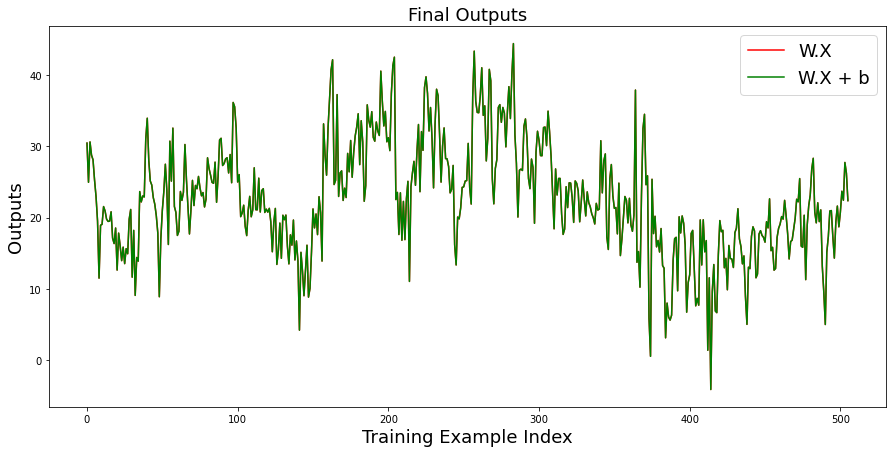

In [0]:
plt.figure(figsize = (15, 7))
plt.plot(range(len(final_outputs1)), final_outputs1, 'r', label = 'W.X')
plt.plot(range(len(final_outputs2)), final_outputs2, 'g', label = 'W.X + b')
plt.title("Final Outputs", fontsize = 18)
plt.xlabel("Training Example Index", fontsize = 18)
plt.ylabel("Outputs", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()
# again as you can see W.X + b completely covers the W.X ......